In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.float_format",lambda x: '%.1f' % x)

In [100]:
from dateutil import parser

'''Since claim_date column has discrepancy in date format like some dates are in m/d/y and some are in d-m-y therefore
   the dates are handled using custom_date_parser whileloading the data. 
   
   FUNCTION LOGIC EXPLANATION:
    Inside the first try block say this date is "3/22/2015" entered, here the parser function will raise value error because as
    the dayfirst is true it expects the month to be lower than 12 but here it is 22 hence it raises value error and the 
    next try block converts the date to correct y-m-d (default) format where dayfirst is False hence accurately handling the discrepancy.    '''

def custom_date_parser(date_str):
    try:
        return parser.parse(date_str, dayfirst=True)
    except ValueError:
        try:
            return parser.parse(date_str, dayfirst=False)
        except ValueError:
            return pd.NaT  

# Load the Excel file with the custom date parser
claims=pd.read_csv('claims.csv', parse_dates=['claim_date'], date_parser=custom_date_parser)
cust=pd.read_csv("cust_demographics.csv")

In [101]:
claims.head(10)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,2018-03-10,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,$2680,1.0,No
5,24050443,21831191,Other driver error,2017-04-10,Auto,No,Injury only,$38306.5,3.0,Yes
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,$1730,4.0,No
7,27026412,73486606,Natural causes,2018-10-04,Auto,No,Material only,$1160,3.0,No
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,$2620,1.0,No
9,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,$2748.5,2.0,Yes


In [102]:
cust

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


No of customers who made no claims

In [103]:
df=pd.merge(cust,claims,left_on="CUST_ID",right_on="customer_id",how="left")
print('Left join on customer: ',df.shape)
cust_no_claims_idx=df[(df.customer_id.isna())].CUST_ID.unique()

print("Customers who have not made any claims:",cust_no_claims_idx)
claims.loc[claims.customer_id.isin(cust_no_claims_idx)]

Left join on customer:  (1092, 16)
Customers who have not made any claims: [38183238 48335931 74888099 36009093 60016590 96861647 70659761]


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent


Total claims for which customer info is not available in data

In [104]:
pd.merge(cust,claims,left_on="CUST_ID",right_on="customer_id",how="right").CUST_ID.isnull().sum()

15

Customers who have made claims more than once.

In [105]:
 
condition=df.customer_id.value_counts()>=2
print(condition[condition].size)
df[df.customer_id.isin(condition[condition].index)].shape

7


(14, 16)

In [106]:
# So making a datframe with inner logic instead of left or right  logic
df=pd.merge(cust,claims,left_on="CUST_ID",right_on="customer_id",how="inner")
print(df.shape)

'''So in summary: 
   
   out of 1085 customers only 1078 made claims.
   Out of 1100 total claims only for 1085 claims the customer info is availale to us.
   1071 customers have made only one claim where as the 7 customers have made claims twice (14) i.e 1071+14=1085.
   
   '''



(1085, 16)


'So in summary: \n   \n   out of 1085 customers only 1078 made claims.\n   Out of 1100 total claims only for 1085 claims the customer info is availale to us.\n   1071 customers have made only one claim where as the 7 customers have made claims twice (14) i.e 1071+14=1085.\n   \n   '

In [107]:
# Formatting column names to their lower case
df.columns=df.columns.map(lambda x: x.lower())
df.columns

Index(['cust_id', 'gender', 'dateofbirth', 'state', 'contact', 'segment',
       'claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent'],
      dtype='object')

## 2. Changing datatypes
- date columns to datetime

In [108]:
df.dtypes

cust_id                         int64
gender                         object
dateofbirth                    object
state                          object
contact                        object
segment                        object
claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
dtype: object

In [109]:
def adjust_year(yr):
    return "19"+yr

df['dateofbirth'] = pd.to_datetime(df['dateofbirth'].str[:-2] + df['dateofbirth'].str[-2:].apply(adjust_year), format='%d-%b-%Y')
print(df.dateofbirth.max()," " ,df.dateofbirth.min())



1999-12-27 00:00:00   1960-01-16 00:00:00


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   cust_id              1085 non-null   int64         
 1   gender               1085 non-null   object        
 2   dateofbirth          1085 non-null   datetime64[ns]
 3   state                1085 non-null   object        
 4   contact              1085 non-null   object        
 5   segment              1085 non-null   object        
 6   claim_id             1085 non-null   int64         
 7   customer_id          1085 non-null   int64         
 8   incident_cause       1085 non-null   object        
 9   claim_date           1085 non-null   datetime64[ns]
 10  claim_area           1085 non-null   object        
 11  police_report        1085 non-null   object        
 12  claim_type           1085 non-null   object        
 13  claim_amount         1020 non-nul

## 3. Changing the amount column's data type to numeric

In [111]:
df.claim_amount

0         $2980
1         $2980
2       $3369.5
3         $1950
4         $1680
         ...   
1080      $1770
1081      $2800
1082     $33080
1083      $2840
1084      $1490
Name: claim_amount, Length: 1085, dtype: object

In [112]:
def fun(x):
    if  type(x)==str:     
        x=x[1:]
        x=float(x)
    if type(x)==float:  # NaN in our amount column is of 'float' type
        return x    

df.claim_amount= df.claim_amount.apply(fun)

In [113]:
df.claim_amount

0       2980.0
1       2980.0
2       3369.5
3       1950.0
4       1680.0
         ...  
1080    1770.0
1081    2800.0
1082   33080.0
1083    2840.0
1084    1490.0
Name: claim_amount, Length: 1085, dtype: float64

## 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [114]:
df.police_report.value_counts()

No         621
Unknown    296
Yes        168
Name: police_report, dtype: int64

In [115]:
df.claim_type.value_counts()

Material only          653
Material and injury    237
Injury only            195
Name: claim_type, dtype: int64

In [116]:
injury_claims_idx=df.claim_type[df.claim_type.str.contains("injury",case=False)].index

def fun(x):
    if x=='No':
        return 1
    elif x=='Yes':
        return 0
    else:            # For the records which are unknown in injury claims are left as unknown So the alert flag contains 0,1,unknown
        return x

df["alert_flag"]= df.loc[injury_claims_idx]['police_report'].apply(fun)

In [118]:
df['alert_flag'].value_counts() 

'''Note that the rest of the data i.e 1085-432=653 is NaN because we are only asked to flag injury related claims. '''

Unknown    150
1          147
0          135
Name: alert_flag, dtype: int64

## 5. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [120]:
df.duplicated().any()

'''There is no duplicated record in the df.'''

False

## 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   cust_id              1085 non-null   int64         
 1   gender               1085 non-null   object        
 2   dateofbirth          1085 non-null   datetime64[ns]
 3   state                1085 non-null   object        
 4   contact              1085 non-null   object        
 5   segment              1085 non-null   object        
 6   claim_id             1085 non-null   int64         
 7   customer_id          1085 non-null   int64         
 8   incident_cause       1085 non-null   object        
 9   claim_date           1085 non-null   datetime64[ns]
 10  claim_area           1085 non-null   object        
 11  police_report        1085 non-null   object        
 12  claim_type           1085 non-null   object        
 13  claim_amount         1020 non-nul

In [122]:
'''There are (65) null or NaN values in claim_amount, (10) total_policy_claims both are numeric columns. So will replace those with mean values.
Note- The alert_flag column has so many nulls because we only made that flag for injury related claims. 
      So i dont think it makes any sense to impute that column with mode.  
'''

def fun(s):
        s.loc[s.isnull()]=np.nanmean(s)
        return s    

df[['claim_amount',"total_policy_claims"]]=df[['claim_amount',"total_policy_claims"]].agg(fun)


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   cust_id              1085 non-null   int64         
 1   gender               1085 non-null   object        
 2   dateofbirth          1085 non-null   datetime64[ns]
 3   state                1085 non-null   object        
 4   contact              1085 non-null   object        
 5   segment              1085 non-null   object        
 6   claim_id             1085 non-null   int64         
 7   customer_id          1085 non-null   int64         
 8   incident_cause       1085 non-null   object        
 9   claim_date           1085 non-null   datetime64[ns]
 10  claim_area           1085 non-null   object        
 11  police_report        1085 non-null   object        
 12  claim_type           1085 non-null   object        
 13  claim_amount         1085 non-nul

## 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
Children < 18

Youth 18-30

Adult 30-60

Senior > 60

In [124]:
df["age"]=(pd.to_datetime('today')-df.dateofbirth).astype("<m8[Y]")

In [125]:
def fun(age):
    if age>=18 and age<30:
        return 'Youth'
    elif age >=30 and age<60:
        return "Adult"
    elif age>=60:
        return "Senior"
    else:
        return "Children"

df["age_grp"]=df.age.apply(fun)

df.age_grp.value_counts()

Adult     808
Youth     169
Senior    108
Name: age_grp, dtype: int64

## 8. What is the average amount claimed by the customers from various segments?

In [126]:
df.groupby('segment').claim_amount.mean()

segment
Gold       12829.6
Platinum   12342.0
Silver     12208.4
Name: claim_amount, dtype: float64

## 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [131]:
pd.to_datetime(date(2018,10,1))-pd.to_timedelta(np.arange(20), 'D')

DatetimeIndex(['2018-10-01', '2018-09-30', '2018-09-29', '2018-09-28',
               '2018-09-27', '2018-09-26', '2018-09-25', '2018-09-24',
               '2018-09-23', '2018-09-22', '2018-09-21', '2018-09-20',
               '2018-09-19', '2018-09-18', '2018-09-17', '2018-09-16',
               '2018-09-15', '2018-09-14', '2018-09-13', '2018-09-12'],
              dtype='datetime64[ns]', freq=None)

In [129]:
from datetime import datetime, date
req_dates=pd.to_datetime(date(2018,10,1))-pd.to_timedelta(np.arange(20), 'D')

In [132]:
df.loc[df.claim_date.isin(req_dates)]["claim_amount"].sum()

237448.86274509804

## 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [138]:
# driver_causes
df.loc[(df.age_grp=="Adult") & (df.incident_cause.str.contains('driver',case=False)) & (df.state.isin(['TX','DE','AK'])) ].cust_id.value_counts().size

26

- Only 26 adults have made total 27 claims in incidents caused by driver from these ['TX','DE','AK'] states and clearly one of the 26 adults has made 2 claims.

## 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

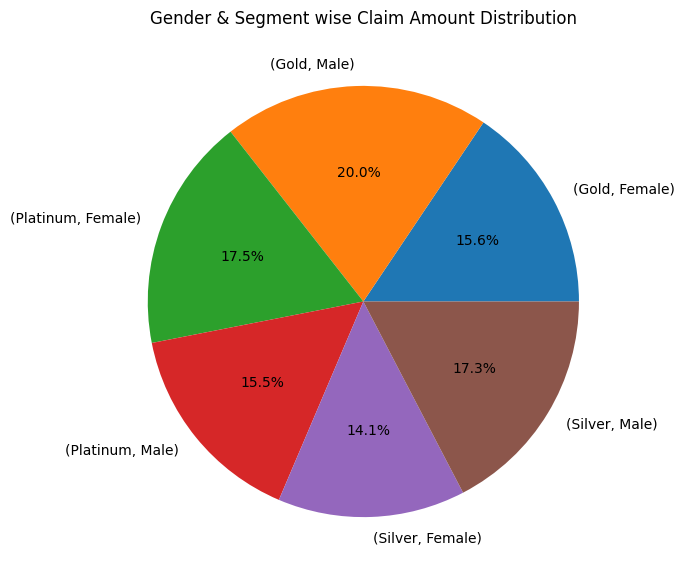

In [186]:
plt.title('Gender & Segment wise Claim Amount Distribution')
df.groupby(['segment','gender']).claim_amount.sum().plot(kind='pie',autopct="%.1f%%",figsize=(9,7))
plt.ylabel("")
plt.show()

## 12. Among males and females, which gender had claimed the most for any type of driver related issues?

In [140]:
driver_related_claims=df[df.incident_cause.str.contains("driver",case=False)]

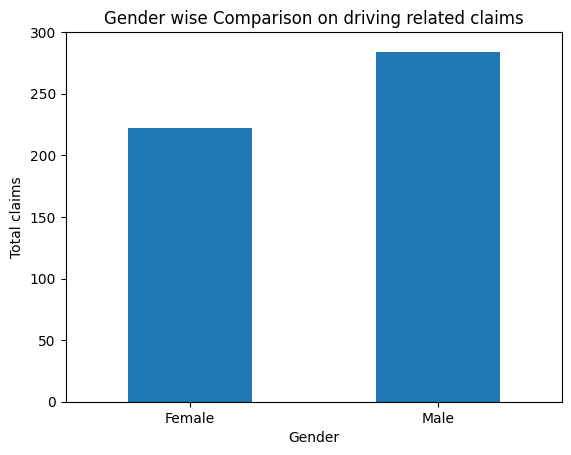

In [141]:
driver_related_claims.groupby('gender').size().plot(kind='bar')
plt.title('Gender wise Comparison on driving related claims')
plt.ylabel('Total claims')
plt.xlabel('Gender')
plt.yticks([0,50,100,150,200,250,300])
plt.xticks(rotation=0)
plt.show()

## 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

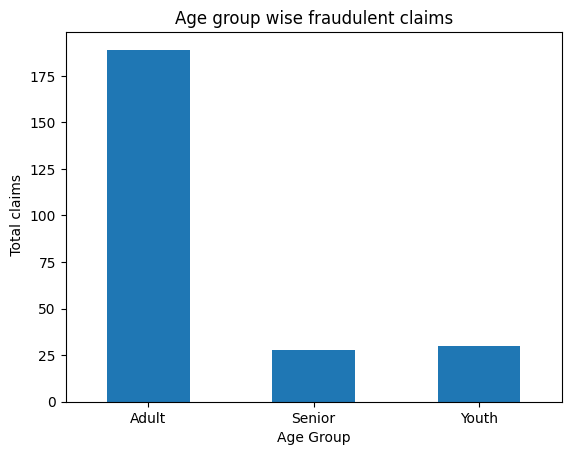

In [142]:
df[df.fraudulent=='Yes'].groupby('age_grp').size().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Age Group')
plt.ylabel(' Total claims')
plt.title('Age group wise fraudulent claims')
plt.show()

## 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [144]:
df['claim_year']=df.claim_date.dt.year

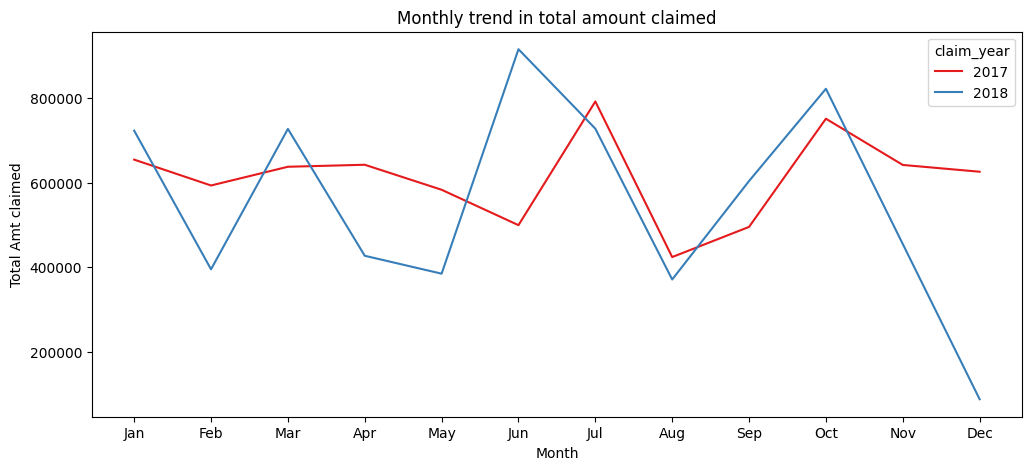

In [145]:
grped=df.groupby([df['claim_year'],df.claim_date.dt.month]).claim_amount.sum().reset_index()

plt.figure(figsize=(12,5))
plt.title('Monthly trend in total amount claimed')
sns.lineplot(grped, x='claim_date',y='claim_amount',hue='claim_year',palette='Set1')
plt.xticks(grped.reset_index().claim_date.unique(),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Month')
plt.ylabel('Total Amt claimed')
plt.show()

## 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

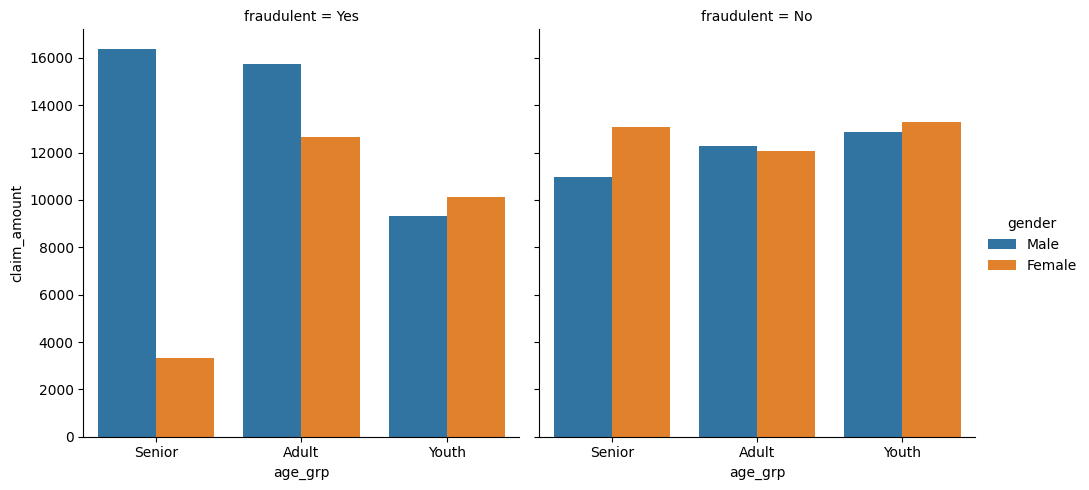

In [146]:
sns.catplot(df.groupby(['gender','age_grp','fraudulent']).claim_amount.mean().reset_index().sort_values(by='claim_amount',ascending=False), \
            kind='bar',x='age_grp',y='claim_amount',hue='gender',col='fraudulent',errorbar=None,sharex=True)
plt.show()

## 16. Is there any similarity in the amount claimed by males and females?

In [147]:
pop_male=df[df.gender=='Male'].claim_amount
pop_female=df[df.gender=='Female'].claim_amount

### Independent two sample t test
#### H0: No significant difference between the amt claimed by males and females
#### Ha: there is significant diff between the amt claimed by M and F

#### **Assumptions**
- Independent observations in both samples
- Normality check for both samples
- Homoescadasticity check i.e variances approximately equal
- Random sampling 

'There are mo extreme or outliers as can be seen through box plot infact there distribution is nearly equal as well.'

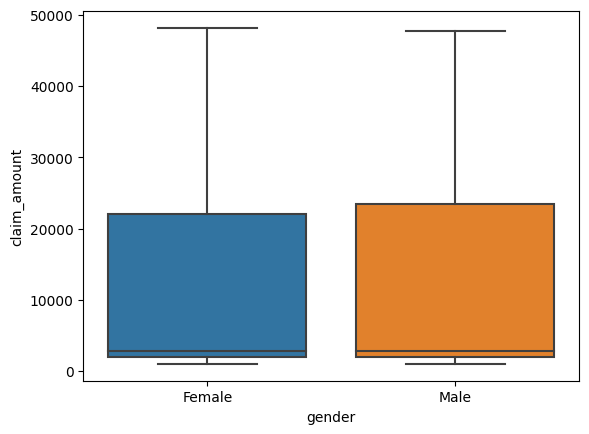

In [148]:
'''Checking if outliers are there or not'''
sns.boxplot(df,x='gender',y='claim_amount')

'''There are mo extreme or outliers as can be seen through box plot infact there distribution is nearly equal as well.'''


In [152]:
'''Since genders are independent of one another so first assumption is satisfied.'''
''' lets also take random sample of 50 from each populations/groups. '''
sample_male=pop_male.sample(50)
sample_female=pop_female.sample(50)

In [588]:
'''Normality check using shapiro test'''
# Ho: the dist is normal
# Ha: the dist is not normal
alpha=0.05 


from scipy.stats import shapiro

shapiro_male=shapiro(sample_male)
shapiro_female=shapiro(sample_female)

print(" shapiro test for male:",shapiro_male)
print("shapiro test for female:",shapiro_female)



 shapiro test for male: ShapiroResult(statistic=0.7313628196716309, pvalue=3.1660157162605174e-08)
shapiro test for female: ShapiroResult(statistic=0.7926698923110962, pvalue=5.967754646007961e-07)


- As per shapiro test our data is not normal but since our sample size is more than 30 we can ignore or violate this assumption as per central limit theorem. 

In [589]:
'''Homosescadasticity of our samples'''
# Ho: the sample variances are similar
# Ha: the sample variances are significantly different

from scipy.stats import levene

levene_test = levene(sample_male, sample_female)
print(levene_test)

'''Since p-value is higher than 0.05 therefore we fail to reject null i.e 
we could not find enough evidence to conclude that the variances are significantly differenet.'''


LeveneResult(statistic=0.14825183001985798, pvalue=0.701045987544944)


'Since p-value is higher than 0.05 therefore we fail to reject null i.e the assumption of nearly equal variances is satisfied'

In [158]:
from scipy.stats import ttest_ind
t_statistic,p_value = ttest_ind(sample_male,sample_female)
print(t_statistic,p_value)

0.4140152711889578 0.679767640951035


In [590]:
'''Lets perform the test now'''

t_statistic,p_value = stats.ttest_ind(sample_male,sample_female)
print(t_statistic,p_value)

-0.3632066856728474 0.7172327604092217


- Since your p-value is 0.71, which is greater than the significance level of 0.05, so **we fail to reject the null hypothesis.** 

- We do not have enough evidence against the null to conclude that there is a significant difference between the amount claimed by males and females.



In [541]:
pop_female.mean(),pop_male.mean() 

'''This difference between the avgerages is not statistically significant at the chosen significance level of 5%.'''

(12062.63470662367, 12853.058506136267)

#### Also lets try non parametric test for two independent samples

In [159]:
from scipy.stats import mannwhitneyu

'''Doing this because to this test the normality doesnt matter.'''
statistic, p_value = mannwhitneyu(sample_male, sample_female)

# Print the test statistic and p-value
print("Mann-Whitney U statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U statistic: 1355.5
p-value: 0.4690784708294664


- conclusion is still the same as p>0.05. 

## 17. Is there any relationship between age category and segment?

### Chi sq test

- It is used to study the association between the two categorical variables.
- It is a non parametric test because it doesnt make use of any famous distribution like in parametric tests.

**Assumptions**
- independence of observations
- random sampling
-mutually exclusive categories ie each observation should fall in one category for each variable.

#### Ho: There is no relationship/association between age grp and segment
#### Ha: There is relationship bw the age grp and segment

In [160]:
contin_tab=pd.crosstab(df.age_grp,df.segment)
contin_tab

segment,Gold,Platinum,Silver
age_grp,,,
Adult,283,268,257
Senior,39,35,34
Youth,53,59,57


In [593]:
from scipy.stats import chi2_contingency

chi_statistic,p_value,dof,expected_freq=chi2_contingency(contin_tab,)
print("p-value:",p_value,"\n","Chi_statistic:",chi_statistic)

p-value: 0.9731256648397683 
 Chi_statistic: 0.503844234668771


The p value is higher than the significance level of 0.05 so **we fail to reject null.** 

We dont have sufficient evidence against the null to conclude that the there is a significant relationship between the two variables.

In [594]:
contin_tab.values-expected_freq  

'''We can see that there is no significant difference between the expected and observed frequency as well which we just proved it above Statistically.'''

array([[ 1.39170507, -0.91520737, -0.4764977 ],
       [ 2.05529954, -0.69861751, -1.35668203],
       [-3.44700461,  1.61382488,  1.83317972]])

## 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

### single sample t test

#### Ho: The mean claim amount for the year 2017-18 is equal to $10,000.
#### Ha: The mean claim amount for the year 2017-18 is greater than $10,000.

In [181]:
'''We are making comparison between FYI 2016-17 and 2017-18'''

claim_amt_2017= df[df.claim_date.dt.year==2017].claim_amount

In [182]:
sample=claim_amt_2017.sample(50)   # Taking a sample from current year (2017-18)

In [183]:
'''Assumptions:
1. random sampling: done
2. independence: done
3. pop std unknown: done
4. Normality: will check now 
'''
# check for normality using Shapiro Wilk test 
# if p<0.05 not normal else it is normal
from scipy.stats import shapiro

shapiro_age = shapiro(sample)

print(shapiro_age)

'''Since n>=30 i.e n=50 so because of CLT it is safe to ignore this violation.'''

ShapiroResult(statistic=0.853337287902832, pvalue=1.9072476789006032e-05)


'Since n>=30 i.e n=50 so because of CLT it is safe to ignore this violation.'

In [184]:
import scipy.stats as stats

pop_mean=10000                         # Prev year (2016-17) avg claim amount. 
t_statistic, p_value = stats.ttest_1samp(sample,pop_mean)   

print("t-statistic:", t_statistic)
print("p-value:", p_value/2)  # div by 2 bcz by default the func does two sided test and we need one tailed.

t-statistic: 2.521159469041504
p-value: 0.007500121929162678


The p-value is lower than significance level of 0.05 hence **we reject the null**

We found strong evidence (from the sample/data we used) against the null to conclude that the avg claim amount for 2017-18 is significantly more than 10000 which is of the previous year (2016-17).

In [601]:
claim_amt_2017.mean()   
'''The actual pop mean is 12.2k which is much higher than 10k which we just proved statistically.'''

12277.55037215555

## 19. Is there any difference between age groups and insurance claims?


<Axes: xlabel='age_grp', ylabel='claim_amount'>

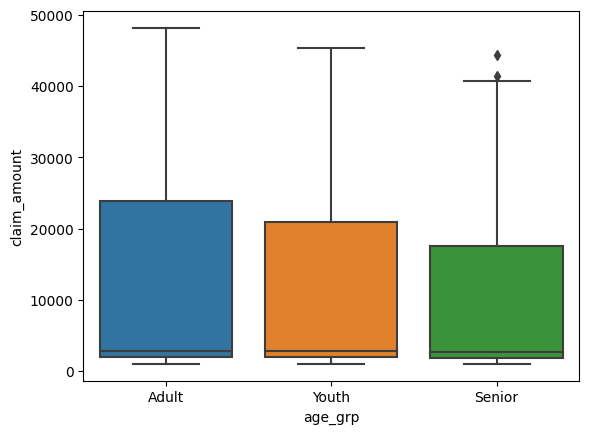

In [163]:
''' Checking if outliers are there in each groups.'''
sns.boxplot(df,y='claim_amount',x="age_grp")

# No outliers as per the box plot


<Axes: xlabel='claim_amount', ylabel='Density'>

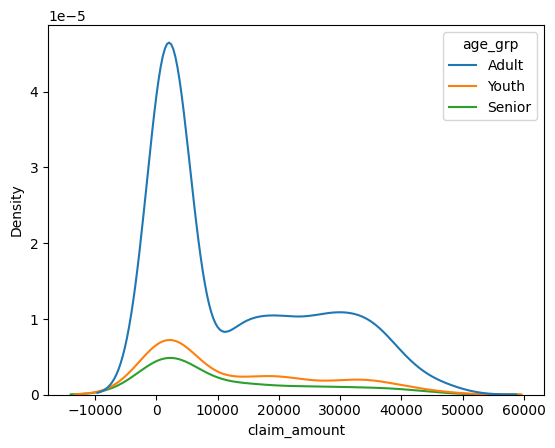

In [164]:
sns.kdeplot(df,x='claim_amount',hue="age_grp")

### ANOVA test

**Assumptions**
- Data in each group should be normally distributed
- Homoscedasticity 
- each grp/sample must be independent

#### Ho: There is no significant difference between the avg claim amt across each grp
#### Ha:  There is atleast one grp which has significantly different avg claim amt than others

In [165]:
adult=df.loc[df.age_grp=='Adult','claim_amount']
youth=df.loc[df.age_grp=='Youth','claim_amount']
senior= df.loc[df.age_grp=='Senior','claim_amount']
youth.shape,senior.shape,adult.shape

((169,), (108,), (808,))

In [166]:
'''Since each of our grp is not normally distributed but as per CLT we have a sample size for each grp >30  
   so we can assume that our grps are normally dist as per CLT.'''

sample_adult=adult.sample(60)
sample_youth=youth.sample(60)
sample_senior=senior.sample(60)

In [615]:
'''Homosescadasticity of each grp'''
# Ho: the sample variances are similar i.e homogeniety of variances
# Ha: the sample variances are significantly different i.e heterogeniety of variances

from scipy.stats import levene

levene_test = levene(sample_adult, sample_youth,sample_senior)
print(levene_test)


LeveneResult(statistic=0.8640787331075195, pvalue=0.42320959324850915)


In [617]:
from scipy.stats import f_oneway
f_statistic, p_value = f_oneway(sample_adult,sample_youth,sample_senior)

# Set significance level
alpha = 0.05

# Print the results
print("F-Statistic:", f_statistic)
print("P-value:", p_value)


F-Statistic: 0.7996433872518025
P-value: 0.4511062382663251


Since p is greater than 0.05 (significance level) **we fail to reject the null.**

So there is insuffient evidence to conclude that there is significant difference in the avg claim amount across the grps. 

In [618]:
adult.mean(),youth.mean(),senior.mean()

(12616.176961390243, 12525.34114227086, 11217.196644042233)

## 20. Is there any relationship between total number of policy claims and the claimed amount?

In [621]:
df.total_policy_claims.value_counts()

1.0    785
2.0    105
3.0     86
4.0     59
5.0     27
6.0     10
1.6     10
7.0      2
8.0      1
Name: total_policy_claims, dtype: int64

Due to this highly imbalanced distribution of total policy claims in our dataset i cant use anova as the power of our statistical test would be reduced.

Therefore i will be doing correlation analysis which is more robust to imbalanced data and flexible in handling non normality of data as well

### Correlation analysis

#### Ho: No significant correlation between total policy claims and claim amount
#### Ha: There is significant correlation between total policy claims and claim amount

In [167]:
from scipy.stats import pearsonr
# Performing Pearson correlation test
correlation_coefficient, p_value = pearsonr(df['total_policy_claims'], df['claim_amount'])

# Printing correlation coefficient and p-value
print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

Correlation Coefficient: -0.01744856239346896
P-value: 0.5658830110321474


The corr coeff is very small and is negative indicating a very weak negative correlation between the the variables.

The p value itself indicating that we fail to reject which means we have insufficient evidence to conclude that there is significant correlation between the two variables i.e the correlation is not statistically significant at 0.05 significance level.